In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt



/Users/sam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data/cruise_ship_info.csv')
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [3]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


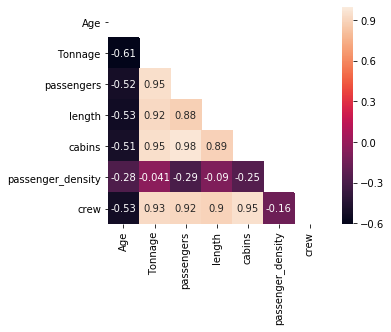

In [4]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, square=True, annot=True)

In [5]:
X = df[['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density']]
X_small = df[['Age', 'Tonnage', 'passengers', 'length', 'cabins']]
y = df['crew']
X.head()

,Age,Tonnage,passengers,length,cabins,passenger_density
0,6,30.277,6.94,5.94,3.55,42.64
1,6,30.277,6.94,5.94,3.55,42.64
2,26,47.262,14.86,7.22,7.43,31.80
3,11,110.000,29.74,9.53,14.88,36.99
4,17,101.353,26.42,8.92,13.21,38.36


In [6]:
X.columns

Index(['Age', 'Tonnage', 'passengers', 'length', 'cabins',
       'passenger_density'],
      dtype='object')

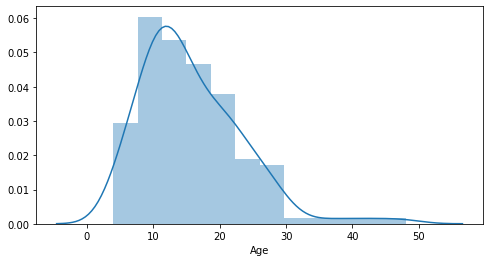

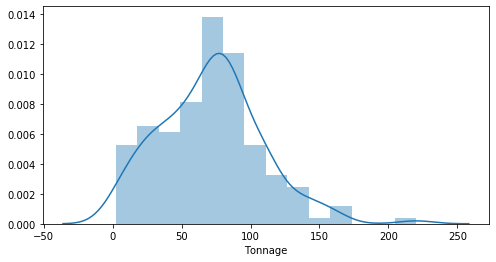

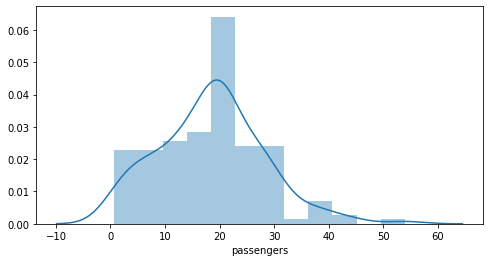

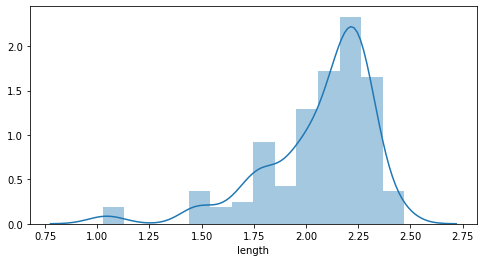

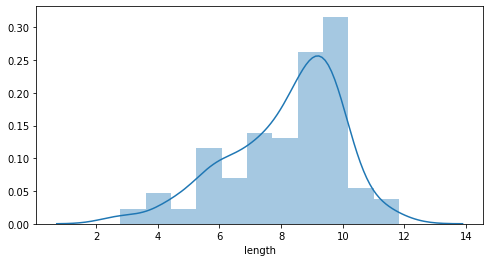

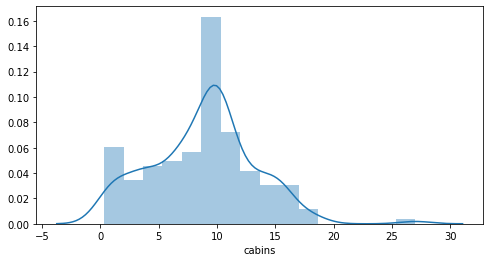

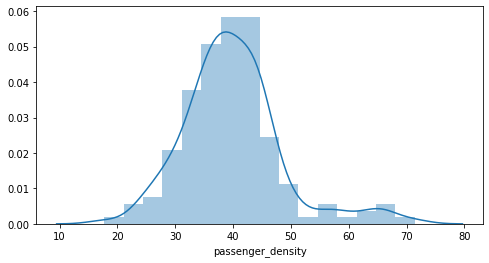

In [7]:
for col in X.columns:
    if col=='length':
        fig, ax = plt.subplots(figsize=(8,4))
        sns.distplot(np.log(X[col]))
    fig, ax = plt.subplots(figsize=(8,4))
    sns.distplot(X[col])

In [8]:
np.log(X['length']).head()

0    1.781709
1    1.781709
2    1.976855
3    2.254445
4    2.188296
Name: length, dtype: float64

In [9]:
ss = StandardScaler()
cols = list(X.columns)
X = pd.DataFrame(ss.fit_transform(X),columns=cols)
X.head()

,Age,Tonnage,passengers,length,cabins,passenger_density
0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057
1,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057
2,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676
3,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017
4,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size=0.33, random_state=41)


In [16]:
lr = LinearRegression()
rfr = RandomForestRegressor()
ensemble = VotingRegressor([('lr',lr),('rf',rfr)])
ensemble.fit(X_train,y_train)
ensemble.score(X_test, y_test)
print(cross_val_score(ensemble,X_train,y_train,scoring='neg_mean_absolute_error'))
print(np.mean(cross_val_score(ensemble,X_train,y_train,scoring='neg_mean_absolute_error')))

[-0.94557494 -0.61609459 -0.63856439 -0.39738181 -0.64749158]
-0.6365909288733633


In [13]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [12]:
y_pred = ensemble.predict(X_small)

NotFittedError: This VotingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

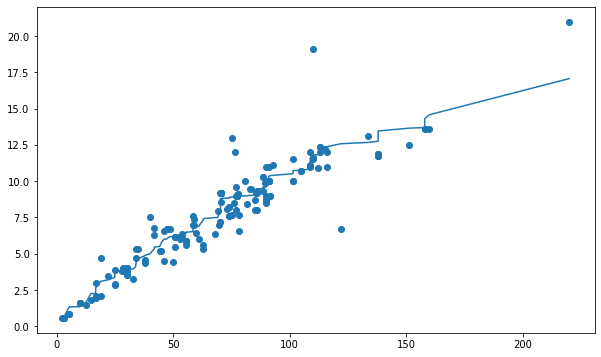

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax = plt.scatter(X_small.Tonnage,y)
ax = plt.plot(np.sort(X_small.Tonnage), np.sort(y_pred))